In [2]:
#Importing Libraries and Modules that will be used
from scipy import linalg as la
from scipy import optimize
import numpy as np
import sympy
sympy.init_printing()
import matplotlib as mpl
import matplotlib.pyplot as plt

Optimal solution: [0.99918879 0.99837437]
Function Value is: 6.595616775723132e-07


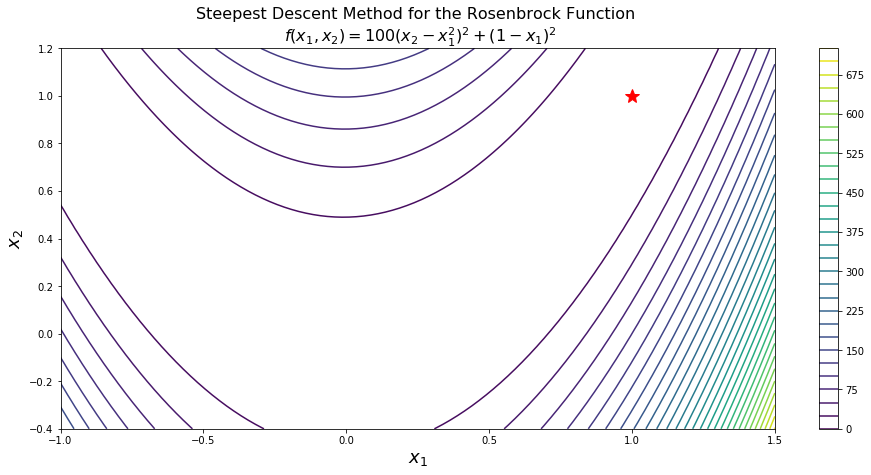

In [3]:
# Steepest Descent Method using Backtracking Line Search with Armijo's Condition
#Create the Objective Function (Rosenbrock Function)
def fobj(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

#Gradient of the Objective Function
def fp(x):
    g11 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    g12 = 200 * (x[1] - x[0]**2)
    return np.array([g11, g12])

#Hessian of the Objective Function
def fh(x):
    h11 = 1200 * x[0]**2 - 400 * x[1] + 2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

x0 = np.array([0, 0]) #initialize

#Chosen Conditions for Backtracking Line Search Algorithm
a = 0.5
p = 0.3
c1 = 1e-4

iter = 0
while la.norm(fp(x0)) > 1e-5 and iter < 2e+3:
    g = -fp(x0)
    a = 0.5 #Reset 'a' using Backtracking Line Search
    #Backtracking Line Search with Armijo's Condition
    iter1 = 0
    while fobj(x0 + a * g) > fobj(x0) + c1 * a * np.dot(fp(x0).T, g):
        a = p * a
        iter1 += 1
    x = x0 + a * g.T
    x0 = x
    iter = iter + 1

print("Optimal solution:", x0)
print("Number of Iterations:", iter)
print("Function Value is:", fobj(x0))


#Redefining the objective Function for plotting
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2

#Plotting
fig, axes = plt.subplots(figsize=(16,7))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = axes.contour(X,Y,fplot(X,Y),30)
axes.plot(x0[0],x0[1],"r*", markersize=15)
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title("Steepest Descent Method for the Rosenbrock Function \n $f(x_1,x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$",fontsize=16)
plt.colorbar(contplot,ax=axes)
plt.show()

Minimum of the Objective function at found at : [0.9985184  0.99703861]
Number of Iterations: 3000
Current Function Value 2.1951453059145587e-06


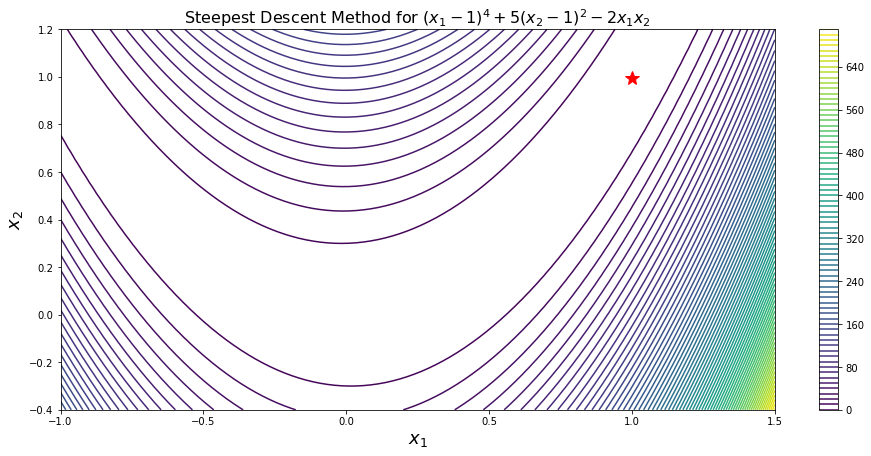

In [11]:
#Steepest Descent Method using a = (g.T *g) / (g.T*H*g)
#Create the Objective Function (Rosenbrock Function)
def fobj(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

#Gradient of the Objective Function
def fp(x):
    g11 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    g12 = 200 * (x[1] - x[0]**2)
    return np.array([g11, g12])

#Hessian of the Objective Function
def fh(x):
    h11 = 1200 * x[0]**2 - 400 * x[1] + 2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

#Steepest Descent Method Similar Algorithm to MATLAB
x0 = np.array([0, 0])
iter = 0
while la.norm(fp(x0)) > 1e-5 and iter < 3e+3:
    g = -fp(x0)
    H = fh(x0)
    a = np.dot(g.T, g) / np.dot(np.dot(g.T, H),g)
    x = x0 + a * g
    x0 = x
    iter = iter + 1

print("Minimum of the Objective function at found at :", x0)
print("Number of Iterations:", iter)
print("Current Function Value", fobj(x0))


#Redefining the objective Function for plotting
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2

fig, axes = plt.subplots(figsize=(16,7))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = axes.contour(X,Y,fplot(X,Y),70)
axes.plot(x0[0],x0[1],"r*", markersize=15)
axes.set_xlabel(r"$x_1$",fontsize=18)
axes.set_ylabel(r"$x_2$",fontsize=18)
axes.set_title(r"Steepest Descent Method for $(x_1-1)^4 + 5(x_2-1)^2-2x_1x_2$",fontsize=16)
plt.colorbar(contplot,ax=axes)
plt.show()